날씨 온도 예측, 종속변수 :actual(최고온도)  
데이터 출처 : https://towardsdatascience.com/random-forest-in-python-24d0893d51c0  
데이터 경로 : /kaggle/input/adp-kr-p2/problem1.csv  
temp_1 : 전날 최고온도  
temp_2 : 전전날 최고온도  
friend : 친구의 예측온도  
<br>
###1-1) 데이터 확인 및 전처리  
- 데이터 EDA 수행  
- 결측치를 확인하고 처리 방안에 대해 논의하라  
- 데이터 분할 방법 설명  
- 최종 데이터셋이 적절함을 주장하라  

###1-2) Random Forest 모델 적합 및 검증  
- 예측 기준선 수립 및 근거 제시  
- Random Forest 학습 및 예측 결과 해석  
- 예측 결과 검정 해석, 중요변수 도출  
- 변수 중요성 분석 및 그래프 출력  

###1-3) SVM(Support Vector Machine) 모델 적합 및 검증  
- 예측 기준선 수립 및 근거 제시  
- SVM 학습 및 예측 결과 해석  
- 예측 결과 검정 해석, 중요변수 도출  
- 변수 중요성 분석 및 그래프 출력  

###1-4) 모델 비교 및 향후 개선 방향 도출
- Random Forest, SVM 모델의 결과 비교 후 최종 모델 선택
- 두 모델의 장단점 분석, 추후 운영 관점에서 어떤 모델을 선택할 것인가?
- 모델링 관련 추후 개선 방향 제시

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/data/adp/week12_기출2/problem1.csv')
df1.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


## 1-1) 데이터 확인 및 전처리
###데이터 EDA 수행

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [ ]:
df1.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


수치로 보았을 때는 전혀 문제가 없어보인다. 범주형 데이터인 요일의 히스토그램, 그리고 날짜별로 수치형 데이터의 시계열 그래프를 그려 혹시 모를 이상값이 있는지 살펴보도록 하겠다.

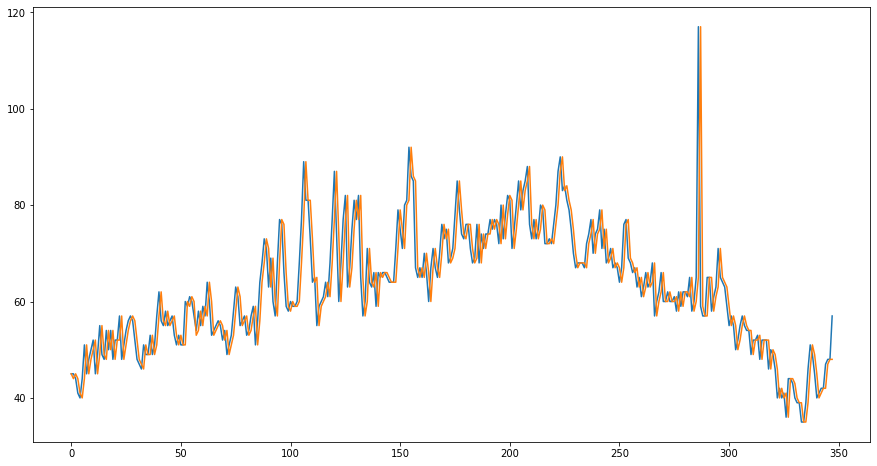

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(df1.temp_1)
plt.plot(df1.temp_2)
plt.show()

temp_1과 temp_2는 하루 차이가 나는 동일 값이기 때문에 동일한 형태의 그래프로 그려진다. 두 값에 이상 없음을 확인하였다.

In [ ]:
df1.tail()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
343,2016,12,27,Tues,42,42,45.2,47,41,50,47,47
344,2016,12,28,Wed,42,47,45.3,48,41,49,44,58
345,2016,12,29,Thurs,47,48,45.3,48,43,50,45,65
346,2016,12,30,Fri,48,48,45.4,57,44,46,44,42
347,2016,12,31,Sat,48,57,45.5,40,42,48,47,57


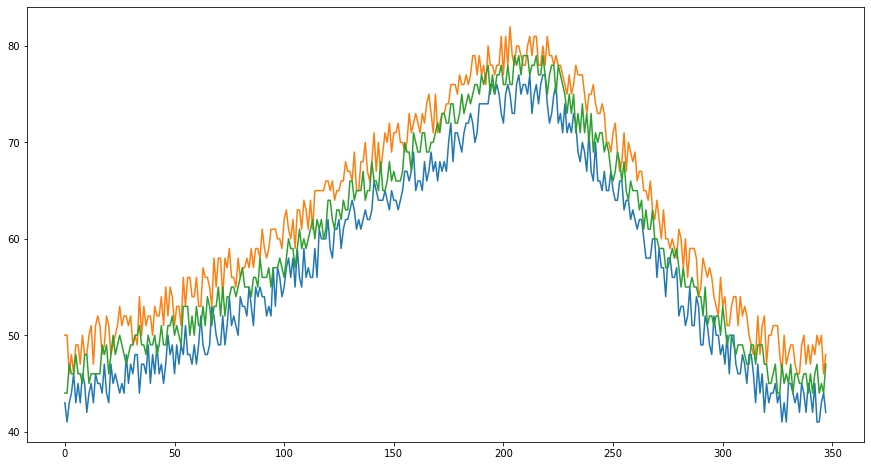

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(df1.forecast_noaa)
plt.plot(df1.forecast_acc)
plt.plot(df1.forecast_under)
plt.show()

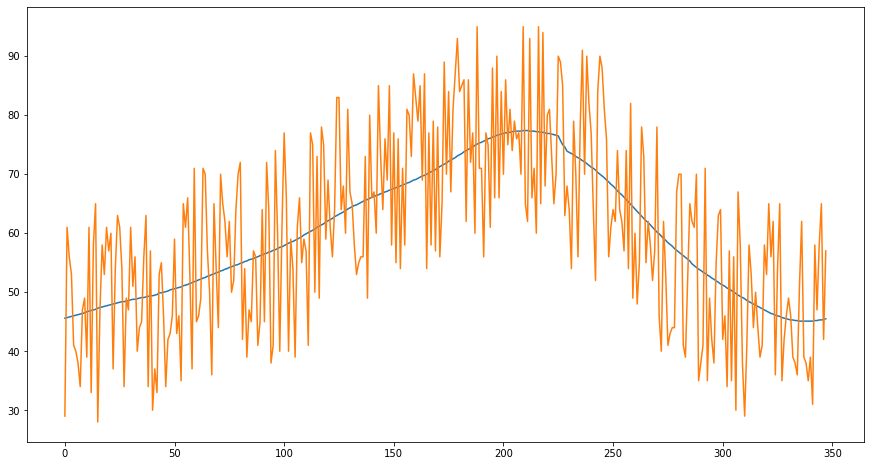

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(df1.average)
plt.plot(df1.friend)
plt.show()

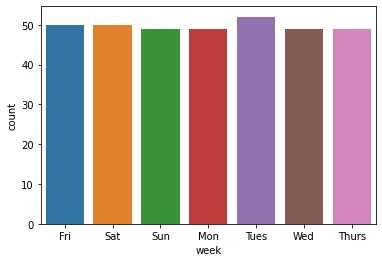

In [ ]:
sns.countplot(x = 'week', data = df1)

그래프 상으로 봤을 때 갑자기 온도가 달라지는 이상값은 존재하지 않음. 
그러나 temp_1, temp_2의 상관성이 높고 나머지 변수들도 그래프 상 비슷한 지점에서 오르고 내리는 등 변수 간의 상관성이 높게 드러남.
시계열 데이터 특유의 트렌드가 반영되어 있는 점도 고려 대상에 해당한다. 좋은 예측을 하기 위해서는 계절성이나 이전 데이터와의 관계도 고려해야 할 것 같다.

In [ ]:
## 범주형 데이터 One hot Encoding
df1 = pd.get_dummies(df1)

### 결측치를 확인하고 처리방법을 논하라
현재 데이터에서 결측치는 확인되지 않는다. 그러나 만약 결측치가 있다면 크게 아래 두 방법으로 해결할 수 있을 것 같다.
1. 간헐적으로 1개~2개의 데이터가 존재하지 않는 경우 : 온도의 특성을 고려하여 (이전 데이터 + 다음날 데이터) / 2 의 값으로 대체할 수 있다. 
2. 여러개의 데이터가 연속으로 빠진 경우 회귀 등의 예측 방법을 이용하여 결측값을 대체할 수 있다.

### 데이터 분할 방법 설명
어떤 모델을 사용할지에 따라 데이터 분할 방법이 달라져야 한다. 만약 시계열 데이터 예측이라면 앞선 달부터 시간 순서대로 나눠도 좋을 것이다. 그러나 SVM과 Random Forest 같이 변수들 간의 상관성이나 target 변수의 트렌드를 생각하지 않고 학습을 시키는 모델이라면, training data에 모든 month의 데이터가 들어가야 한다. 예를 들어 봄, 여름, 가을의 데이터만 학습한 모델은 겨울의 온도를 정확하게 예측하기 어렵기 때문이다.   
따라서 랜덤하게 각 월별로 데이터를 7:3으로 나누어 training data와 test data를 만들면 가장 좋다. 하지만 전체 데이터를 핸덤하게 7:3으로 나누면 확률적으로 각 계절 데이터가 비슷하게 들어가게 되므로, train_test_split을 이용해 랜덤하게 나눈 뒤 X 데이터의 month 분포가 치우치지 않았는지만 확인해준다.

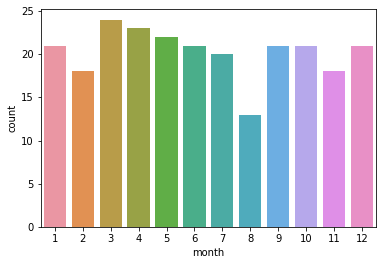

In [ ]:
from sklearn.model_selection import train_test_split
y = df1[['actual']]
X = df1.drop(columns = ['actual'])
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3)

sns.countplot(x = 'month', data = train_X)

계절별로 학습 데이터 개수에 큰 편차는 보이지 않기 때문에 현재 나누어진 데이터를 이용해 학습을 시킨다.

## 1-2) Random Forest 모델 적합 및 검증
### 예측 기준선 수립 및 근거 제시
예측 기준선은 Decision Tree의 성능을 상회하는 것으로 한다. Random Forest는 Bootstraping 방식으로 여러개의 트리를 만들어 결과를 내기 떄문에 Decision Tree와 분류 메커니즘은 동일하나 속도는 느리다. 
따라서 Random Forest가 Decision Tree의 정확도보다 높지 않다면 Random Forest를 써야 할 이유가 없다.  
아래 트리 모델의 성능에 의해 Random Forest 성능은 mse가 43.69 보다 작아야 한다.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
import time
tree_model = DecisionTreeRegressor()

start_time = time.time()
tree_model.fit(train_X,train_y)
end_time = time.time()
tree_pred = tree_model.predict(test_X)

In [ ]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(test_y, tree_pred)) # 성능
print(end_time - start_time) #속도

43.695238095238096
0.010302066802978516


### Random Forest 학습 및 예측 결과 해석

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
forest_model = RandomForestRegressor()

start_time = time.time()
forest_model.fit(train_X, train_y)
end_time = time.time()
forest_pred = forest_model.predict(test_X)

print(mean_squared_error(test_y, forest_pred)) # 성능
print(end_time - start_time) #속도

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


23.943997142857146
0.32842278480529785


위 학습 결과를 보았을 때 Random Forest 모델은 Tree 모델 학습 속도의 약 30배를 필요로하며, 오차는 절반 수준으로 줄이는 것을 알 수 있다. 

### 예측 결과 검정 해석, 중요변수 도출

In [ ]:
forest_importances = pd.Series(forest_model.feature_importances_, index = X.columns)
forest_importances.sort_values()

year              0.000000
week_Thurs        0.001144
week_Wed          0.001608
week_Tues         0.001841
week_Fri          0.001939
week_Sat          0.002333
week_Sun          0.003312
week_Mon          0.005814
forecast_under    0.011600
month             0.012732
temp_2            0.014275
day               0.018006
friend            0.018362
forecast_acc      0.021128
forecast_noaa     0.034355
average           0.235764
temp_1            0.615789
dtype: float64

가장 중요한 변수는 temp1, average 순으로 나타났고, 나머지 변수들은 예측에 기여하는 정도가 3퍼센트 미만으로 드러났다. 

### 변수 중요성 분석 및 그래프 출력

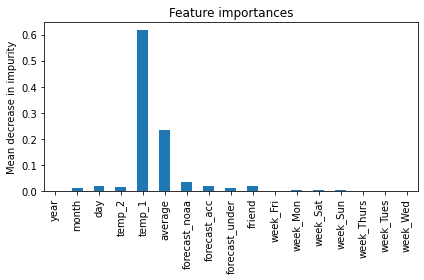

In [ ]:
std = np.std([forest_model.feature_importances_ for tree in forest_model.estimators_], axis=0)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

temp_1이 극단적으로 높은 중요도를 갖는 이유는 Random Forest 모델의 특징과 연관지어 생각할 수 있다. 
먼저 온도는 도메인 지식에 기반하여 생각했을 때, 전 날의 온도에 가장 민감하게 반응하는 타겟 변수이다. 
Random Forest는 Tree를 나눌 때 가장 연관성 있는 변수를 재사용할 수 있기 때문에 관련성이 상대적으로 높은 temp_1이 계속해서 노드를 나누는 데 쓰인 것이다. 
만약 성능을 높이거나 오버피팅을 줄이고자 한다면, 하위 tree를 만들 때 전체 변수 중 n개의 변수만 랜덤하게 뽑아 사용하도록 설정하면 된다.

## SVM(Support Vector Machine) 모델 적합 및 검증
### 예측 기준선 수립 및 근거 제시
SVM은 커널 방법을 이용해 고차원에서 평면을 분할하기 때문에 Random Forest와 자주 비교되는 알고리즘이다. 
Random Forest와 SVM 모두 Decision Tree보다 학습에 오랜 시간이 소요되는 알고리즘으로, SVM 또한 단순한 Decision Tree보다 정확도가 높아야 사용할 유인이 있다. 따라서 SVM도 Decision Tree의 mse였던 43보다 작아야 한다. 

### SVM 학습 및 예측 결과 해석

In [ ]:
from sklearn.svm import SVR

svm_model = SVR(kernel = 'rbf')  ## 일반적으로 가장 좋은 성능을 보이는 가우시안 커널 사용

start_time = time.time()
svm_model.fit(train_X, train_y)
end_time = time.time()
svm_pred = svm_model.predict(test_X)

print(mean_squared_error(test_y, svm_pred)) # 성능
print(end_time - start_time) #속도

131.5985614090459
0.021784305572509766


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
svm_pred

array([63.0384784 , 62.80789115, 62.90572336, 62.82039155, 62.80840301,
       63.00501122, 62.91053398, 63.00994887, 62.88459566, 62.81058351,
       62.81254004, 63.00262281, 62.79269584, 62.89675999, 63.02969301,
       62.76464983, 62.96297152, 62.87224747, 62.99293281, 62.86585593,
       62.81364691, 62.95751171, 62.77645665, 62.84658626, 62.99643238,
       62.84213102, 62.93943864, 62.98650973, 62.82037275, 62.80030547,
       62.80787265, 62.77545447, 62.99328671, 62.88200754, 62.87316471,
       62.87670465, 62.9878087 , 62.80311676, 62.82029905, 62.93298781,
       62.83706703, 62.75379875, 62.99666187, 62.99934504, 62.77663462,
       62.96168156, 62.96104659, 62.79867872, 62.94016792, 62.94456078,
       62.80939329, 62.88400255, 62.82076686, 63.01372606, 62.78985179,
       62.9757665 , 62.94498335, 62.9678077 , 62.85308479, 62.96571667,
       62.78983298, 62.82726169, 62.93795857, 62.84220557, 62.81592976,
       62.89913887, 62.90312509, 62.82977349, 62.99864771, 62.89

SVM으로 예측한 test set의 mse는 약 131로 Decision Tree보다 높게 나왔다. 
error가 너무 크기 때문에 데이터가 커널의 성질에 적합하지 않을 수 있다고 생각하여 (온도 데이터는 단순한 형태이기 때문에 Gaussian보다 더 단순하게 분류하는 커널이 좋을 수 있다고 판단) 커널을 바꿔서 예측해보았다.

In [ ]:
svm_model2 = SVR(kernel = 'linear')  ## 일반적으로 가장 좋은 성능을 보이는 가우시안 커널 사용

start_time = time.time()
svm_model2.fit(train_X, train_y)
end_time = time.time()
svm_pred = svm_model2.predict(test_X)

print(mean_squared_error(test_y, svm_pred)) # 성능
print(end_time - start_time) #속도

24.465025413546194
0.1957714557647705


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


linear kernel로 바꾸었을 때 성능은 Random Forest의 성능과 비슷하였다. 그러나 실행시간은 0.2초 정도로, Random Forest 학습 속도의 약 2/3 수준이다. 

In [ ]:
plt.scatter(x, y, s=5, color="blue", label="original")
plt.plot(x, yfit, lw=2, color="red", label="fitted")
plt.legend()
plt.show()

## 모델 비교 및 향후 개선 방향 도출
### Random Forest, SVM 모델의 결과 비교 후 최종 모델 선택

Random Forest와 SVM 은 정확도 측면에서 비슷한 결과를 보였다. 아래 그래프로 두 모델이 예측한 값을 시각화하였을 때도, 거의 비슷하게 예측하고 있음을 확인할 수 있다.   

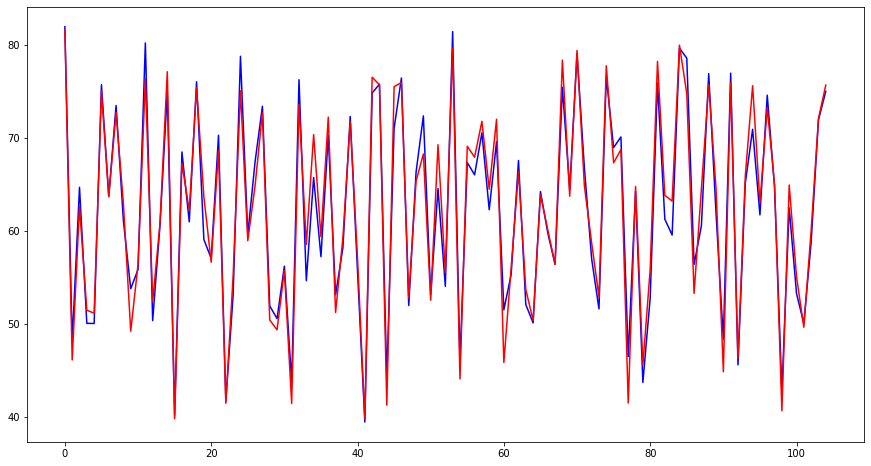

In [ ]:
plt.figure(figsize = (15,8))
plt.plot(svm_pred, color = 'blue')
plt.plot(forest_pred, color = 'red')
plt.show()

두 모델의 성능이 비슷할 때는 학습 시간이 더 적게 걸린 모델을 선택하는 것이 일반적이다. SVM이 Random Forest의 2/3 수준에서 학습 속도가 단축되었으므로 SVM을 선택할 수 있다. 

### 두 모델의 장단점 분석, 추후 운영 관점에서 어떤 모델을 선택할 것인가?
SVM 모델은 feature의 수가 많아져도 다른 모델에 비해 정확도 이슈에 문제가 생기지 않는다는 장점이 있다. (희소데이터 예측에 강하기 때문) 현 데이터에서는 요일을 One-Hot Encoding 처리했기 때문에 6개의 컬럼이 더 생겨났고, 이런 점에서는 Sparse Data 예측에 특화된 SVM이 강점을 보일 수 있다. 또한 Random Forest보다 오버피팅 가능성이 적은 것으로 알려져있다.
반면 Random Forest는 범주형,연속형 데이터 모두에 잘 쓰일 수 있고, 일반적으로 학습속도가 SVM보다 빠른 것으로 알려져있다. 만약 온S도 예측을 매년 지속하게 된다면, 학습 데이터가 많아져 이러한 Random Forest의 강점이 필요하게 될 수 있다. 또한 Random Forest는 예측에 사용된 변수의 중요성을 시각화할 수 있고, 각 node의 판별 기준이 명확하게 드러나기 때문에 설명하기 쉽다. 운영 부서에서 상급자를 설득해야 하는 경우 결과를 설명하기 쉬운 Random Forest의 장점이 드러날 수 있다. 
전체적으로 Random Forest는 SVM보다 단순한 형태의 예측이라고 말할 수 있고 (학습 속도와 결과 해석의 용이성) 머신러닝 모델은 성능이 같을 때 단순할수록 좋기 때문에 Random Forest를 선택할 것이다. 

### 모델링 관련 추후 개선 방향 제시

1. 해당 모델은 시계열 계절성을 이용해 ARIMA 모형으로 예측하는 것이 장기적 관점에서 좋은 성능을 낼 수 있을 것이라 생각한다.
2. 주어진 독립변수끼리 상관성이 높다. 단 1,2개의 변수가 나머지 변수 전체를 설명할 수 있기 때문에 굳이 여러개의 변수를 사용할 필요가 없다. 변수선택 또는 차원축소 방법을 통하여 변수 개수를 줄이는 것이 좋다. 